In [52]:
from load_h5 import Dataset4h5
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import h5py
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq

In [54]:
dataset = Dataset4h5('/storage/home/hcoda1/3/bxia34/scratch/LEN128-DIM64-CUB8-4.4-131.341.h5', num_image=8, num_redshift=512, HII_DIM=64, rescale=False, dim=3)

dataset content: <KeysViewHDF5 ['brightness_temp', 'density', 'kwargs', 'params', 'redshifts_distances', 'seeds', 'xH_box']>
1000 images can be loaded
field.shape = (64, 64, 514)
params keys = [b'ION_Tvir_MIN', b'HII_EFF_FACTOR']
loading 8 images randomly
images loaded: (8, 1, 64, 64, 512)
params loaded: (8, 2)
images rescaled to [0.0, 42.34901809692383]
params rescaled to [4.4, 131.341]


In [55]:
with h5py.File("/storage/home/hcoda1/3/bxia34/scratch/LEN128-DIM64-CUB8-4.4-131.341.h5") as f:
    print(f.keys())
    print(f['redshifts_distances'])
    los = f['redshifts_distances'][:,-512:]

<KeysViewHDF5 ['brightness_temp', 'density', 'kwargs', 'params', 'redshifts_distances', 'seeds', 'xH_box']>
<HDF5 dataset "redshifts_distances": shape (2, 514), type "<f8">


In [56]:
los.shape

(2, 512)

In [57]:
dataloader = DataLoader(dataset, batch_size=8)

In [58]:
len(dataloader)

1

In [59]:
x, c = next(iter(dataloader))

In [60]:
x.shape

torch.Size([8, 1, 64, 64, 512])

In [62]:
c.shape

torch.Size([8, 2])

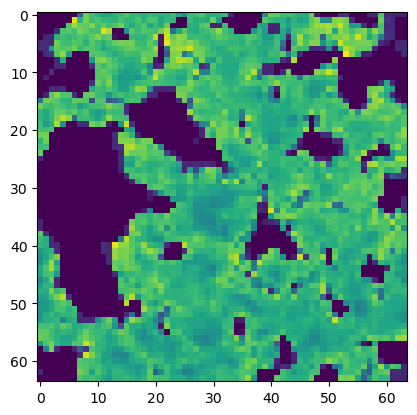

In [63]:
plt.imshow(x[0,0,:,:,-1])

In [137]:
# for i, (x,c) in enumerate(dataloader):
#     # print(c)
#     plt.imshow(x[0,0])
#     plt.show()

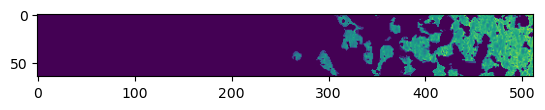

In [138]:
plt.imshow(x[0,0,0])

In [143]:
print(x.shape)
Tb = torch.mean(x, axis=2)
print(Tb.shape)
Tb = torch.mean(Tb, axis=2)
print(Tb.shape)
# print(Tb.shape)
# print(Tb[:,0,:].shape)
# print(Tb[:10, 0, :].shape)

torch.Size([8, 1, 64, 64, 512])
torch.Size([8, 1, 64, 512])
torch.Size([8, 1, 512])


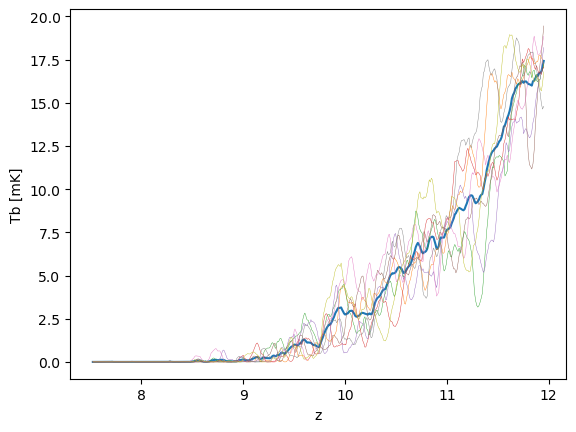

In [145]:
plt.plot(los[0,:], Tb[:,0,:].mean(axis=0))
for i in range(8):
    plt.plot(los[0,:], Tb[i,0,:], lw=0.3)
# plt.plot(los[0,:], Tb[1,0,:])
# plt.plot(los[0,:], Tb[2,0,:])
# plt.yscale('log')
plt.ylabel('Tb [mK]')
plt.xlabel('z')
plt.show()

In [146]:
from scipy.fftpack import fftn, fftshift

def compute_power_spectrum(signal):
    signal_ft = fftn(signal)
    power_spectrum = np.abs(signal_ft)**2
    return power_spectrum

In [147]:
x.shape

torch.Size([8, 1, 64, 64, 512])

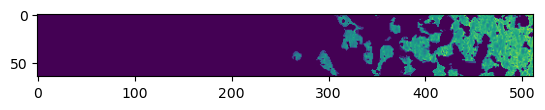

In [149]:
plt.imshow(x[0,0,0])

In [150]:
PS_x = compute_power_spectrum(x[0,0].numpy())

In [151]:
PS_x.shape

(64, 64, 512)

(64, 64, 512)


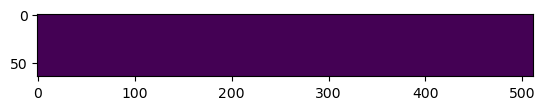

In [153]:
plt.imshow(PS_x[0])
# print(PS_x)
print(PS_x.shape)

(64, 64, 512)


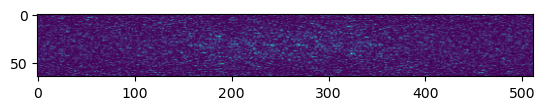

In [156]:
PS_x_shift = fftshift(PS_x)
plt.imshow((PS_x_shift[0]))
# plt.imshow(np.log(PS_x_shift))
# print(PS_x_shift)
print(PS_x_shift.shape)

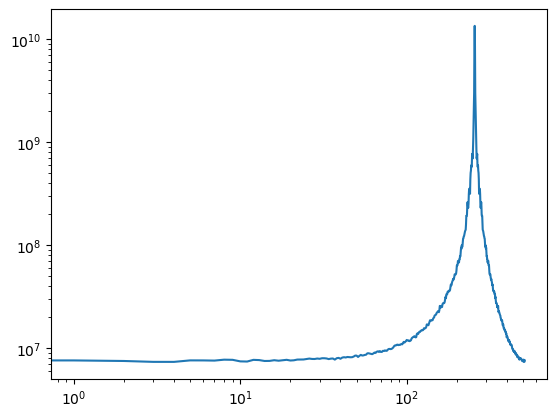

In [164]:
plt.plot((PS_x_shift.mean(axis=0).mean(axis=0)))
plt.yscale('log')
plt.xscale('log')

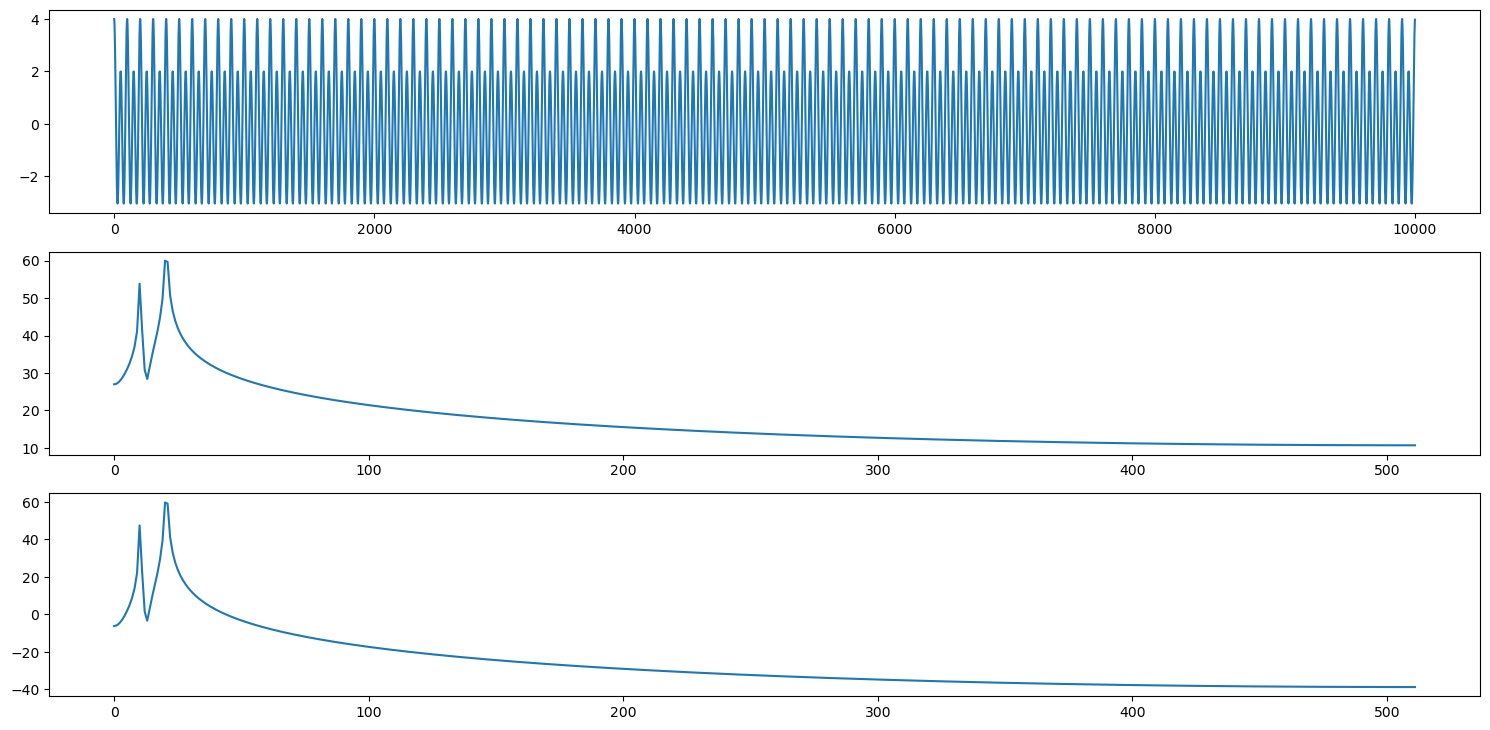

In [9]:
fs = 10000
num_fit = 1024
t = np.arange(0,1,1/fs)
f0 = 100
f1 = 200
x = np.cos(2*np.pi*f0*t) + 3*np.cos(2*np.pi*f1*t)# + np.random.randn(t.size)
plt.figure(figsize=(15, 12))
plt.subplot(511)
plt.plot(x)

Y = fft(x, num_fit)
Y = np.abs(Y)
plt.subplot(512)
plt.plot(20*np.log10(Y[:num_fit//2]))

ps = Y**2 / num_fit
plt.subplot(513)
plt.plot(20*np.log10(ps[:num_fit//2]))


plt.tight_layout()

[[ 8.89541477e+00 -2.69607804e-01  1.49812114e+00 ... -1.72162500e+00
  -2.87998181e-03 -2.25894307e-01]
 [-1.55839761e+00  1.13099721e+01 -8.00581697e-01 ...  3.87367930e-01
   2.80610626e+00  5.35417011e-02]
 [ 3.20155890e-01  1.09817014e-02  1.02500135e+01 ...  1.37711006e+00
  -3.07529416e-01 -4.62971917e-01]
 ...
 [ 6.63180511e-01  4.37764356e-01 -3.37650968e-01 ...  8.96867023e+00
  -2.00227738e-02  1.09916609e+00]
 [-1.58354395e+00  7.06822751e-02 -4.80500247e-02 ... -3.69908801e-01
   1.04547126e+01  7.89122316e-01]
 [-8.25031344e-01 -4.42889669e-01 -5.27405349e-01 ...  7.49184146e-03
  -2.20606371e-02  1.13877085e+01]]


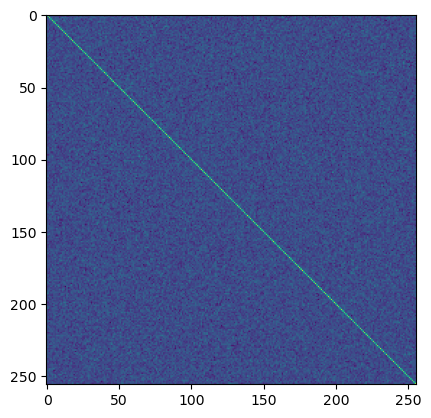

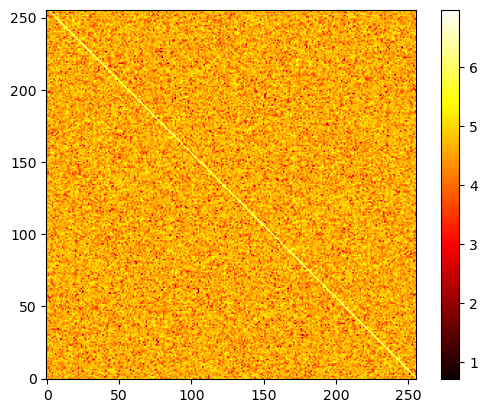

In [19]:
size = 256
field = np.random.normal(0,1,(size,size)) + np.eye(size,size)*10
print(field)
ps = np.fft.fftshift(np.fft.fft2(field))
ps = np.abs(ps)**2
plt.imshow(field)
plt.show()
plt.imshow(np.log10(ps), cmap='hot', origin='lower')
plt.colorbar()
plt.show()

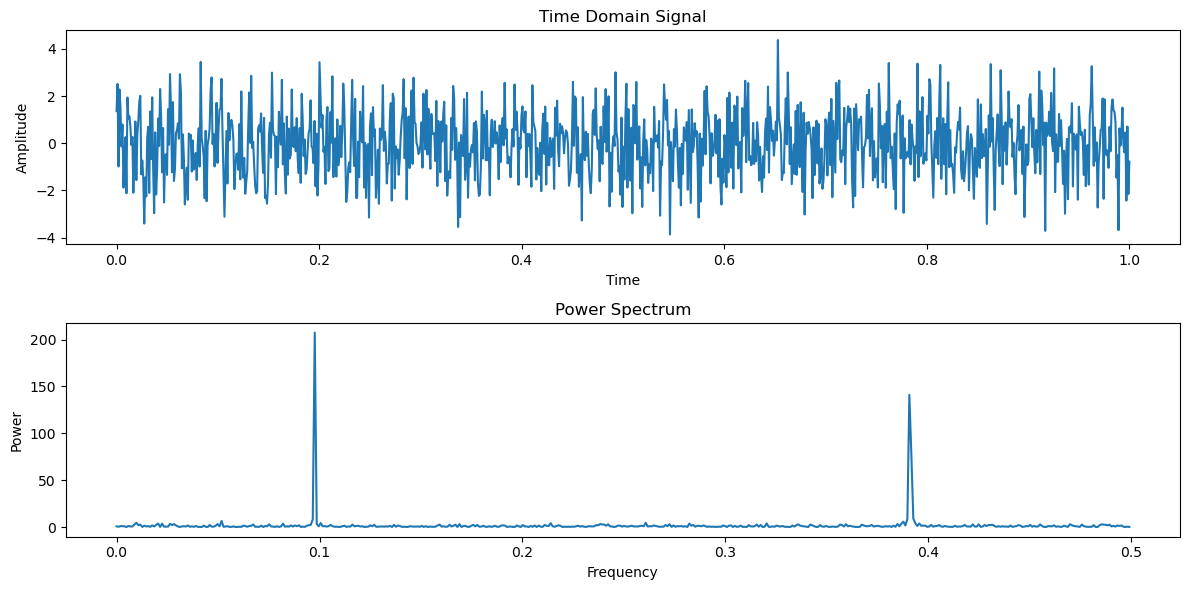

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个示例信号
# 这里我们使用两个正弦波的叠加作为示例信号
def generate_signal(N, f1, f2, A1, A2, noise_level):
    t = np.linspace(0, 1, N)
    signal = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)
    noise = noise_level * np.random.randn(N)
    return t, signal + noise

# 功率谱计算
def compute_power_spectrum(signal, N):
    fft_result = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N)
    power_spectrum = np.abs(fft_result) ** 2 / N
    return fft_freqs[:N // 2], power_spectrum[:N // 2]

# 参数设置
N = 1024  # 信号长度
f1, f2 = 100, 400  # 信号频率
A1, A2 = 1, 1  # 信号幅度
noise_level = 1  # 噪声水平

# 生成信号
t, signal = generate_signal(N, f1, f2, A1, A2, noise_level)

# 计算功率谱
freqs, power_spectrum = compute_power_spectrum(signal, N)

# 绘图
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freqs, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')

plt.tight_layout()
plt.show()


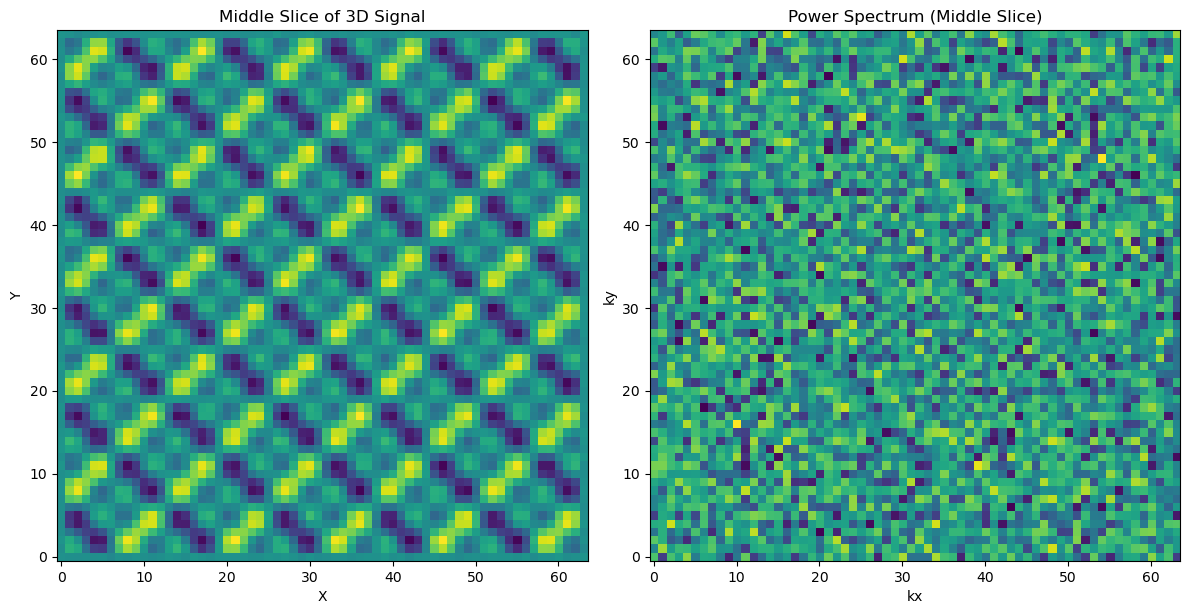

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftn, fftshift

# 生成一个三维示例信号
def generate_3d_signal(Nx, Ny, Nz, f1, f2, A1, A2, noise_level):
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    z = np.linspace(0, 1, Nz)
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    signal = (A1 * np.sin(2 * np.pi * f1 * X) * np.sin(2 * np.pi * f1 * Y) * np.sin(2 * np.pi * f1 * Z) +
              A2 * np.sin(2 * np.pi * f2 * X) * np.sin(2 * np.pi * f2 * Y) * np.sin(2 * np.pi * f2 * Z))
    noise = noise_level * np.random.randn(Nx, Ny, Nz)
    return signal + noise

# 功率谱计算
def compute_3d_power_spectrum(signal):
    fft_result = fftn(signal)
    power_spectrum = np.abs(fft_result) ** 2
    power_spectrum = fftshift(power_spectrum)
    return power_spectrum

# 参数设置
Nx, Ny, Nz = 64, 64, 64  # 信号维度
f1, f2 = 5, 10  # 信号频率
A1, A2 = 1, 0.5  # 信号幅度
noise_level = 0.01  # 噪声水平

# 生成信号
signal = generate_3d_signal(Nx, Ny, Nz, f1, f2, A1, A2, noise_level)

# 计算功率谱
power_spectrum = compute_3d_power_spectrum(signal)

# 绘图
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 时域信号的中间切片
ax[0].imshow(signal[:, :, Nz // 2], origin='lower')
ax[0].set_title('Middle Slice of 3D Signal')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# 功率谱的中间切片
ax[1].imshow(np.log(power_spectrum[:, :, Nz // 2] + 1), origin='lower')
ax[1].set_title('Power Spectrum (Middle Slice)')
ax[1].set_xlabel('kx')
ax[1].set_ylabel('ky')

plt.tight_layout()
plt.show()


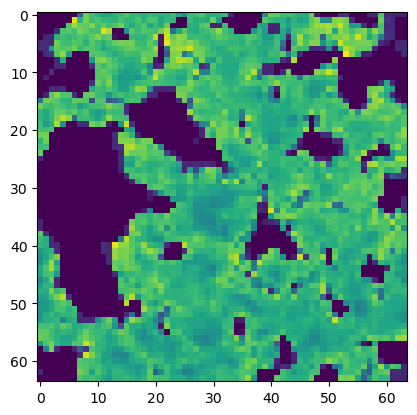

In [64]:
plt.imshow(x[0,0,:,:,-1])

(19,)
(19,)
[0.01117653 0.01380642 0.01705514 0.0210683  0.02602578 0.03214978
 0.03971479 0.04905988 0.06060393 0.07486434 0.0924803  0.11424139
 0.14112298 0.17432994 0.21535066 0.26602378 0.32862053 0.40594663
 0.50146795]
[0.42191123 1.15472966 0.32017917 0.93714485 0.93837458 0.9646672
 1.089401   0.91620453 1.00267798 0.91367929 1.01122735 1.00413472
 1.00567808 1.01053035 0.98953211 1.01161368 0.99565562 0.99425842
 0.98990073]


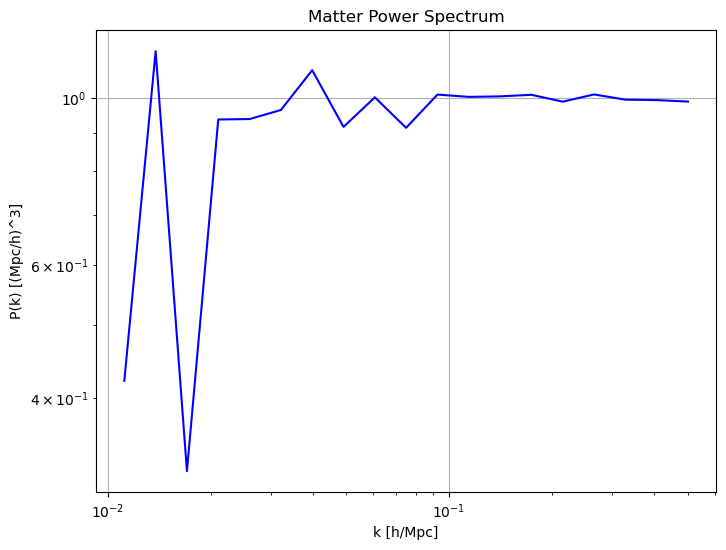

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def compute_3d_power_spectrum(density_field, box_size):
    """
    计算三维密度场的物质功率谱
    
    参数:
    density_field (numpy.ndarray): 三维密度场数组
    box_size (float): 盒子的物理大小（单位Mpc/h）

    返回:
    k_vals (numpy.ndarray): 波数
    Pk (numpy.ndarray): 功率谱
    """
    # 获取密度场的形状
    Nx, Ny, Nz = density_field.shape
    N = Nx  # 假设立方体

    # 计算傅里叶变换
    delta_k = np.fft.fftn(density_field)
    delta_k = np.fft.fftshift(delta_k)  # 将零频移到中心

    # 计算功率谱
    Pk = np.abs(delta_k) ** 2 / (N ** 3)

    # 创建波数k的网格
    kx = np.fft.fftfreq(N, d=box_size / N)
    ky = np.fft.fftfreq(N, d=box_size / N)
    kz = np.fft.fftfreq(N, d=box_size / N)
    kx, ky, kz = np.meshgrid(kx, ky, kz, indexing='ij')
    k = np.sqrt(kx**2 + ky**2 + kz**2)

    # 将结果移回零频在中心
    k = np.fft.fftshift(k)
    Pk = np.fft.fftshift(Pk)
    mask = k > 0
    k = k[mask]
    Pk = Pk[mask]

    # 平均功率谱
    k_flat = k.flatten()
    Pk_flat = Pk.flatten()

    # 创建波数的对数间隔
    k_bins = np.logspace(np.log10(k_flat.min()), np.log10(k_flat.max()), num=20)
    k_vals = 0.5 * (k_bins[1:] + k_bins[:-1])
    Pk_vals = np.zeros_like(k_vals)

    # 在每个波数区间内进行平均
    for i in range(len(k_bins) - 1):
        mask = (k_flat >= k_bins[i]) & (k_flat < k_bins[i+1])
        if np.any(mask):
            Pk_vals[i] = np.mean(Pk_flat[mask])

    return k_vals, Pk_vals

# 示例三维密度场
N = 64  # 密度场的大小
box_size = 100.0  # 盒子大小（单位Mpc/h）
density_field = np.random.randn(N, N, N)  # 示例密度场，可以替换为实际数据

# 计算物质功率谱
k_vals, Pk_vals = compute_3d_power_spectrum(density_field, box_size)
print(k_vals.shape)
print(Pk_vals.shape)
print(k_vals)
print(Pk_vals)

# 绘制功率谱
plt.figure(figsize=(8, 6))
plt.loglog(k_vals, Pk_vals, 'b-')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [(Mpc/h)^3]')
plt.title('Matter Power Spectrum')
plt.grid(True)
plt.show()


(19,)
(19,)


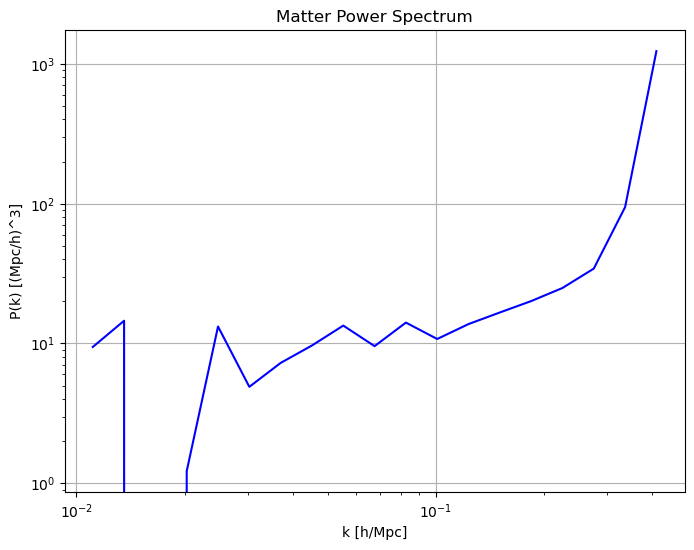

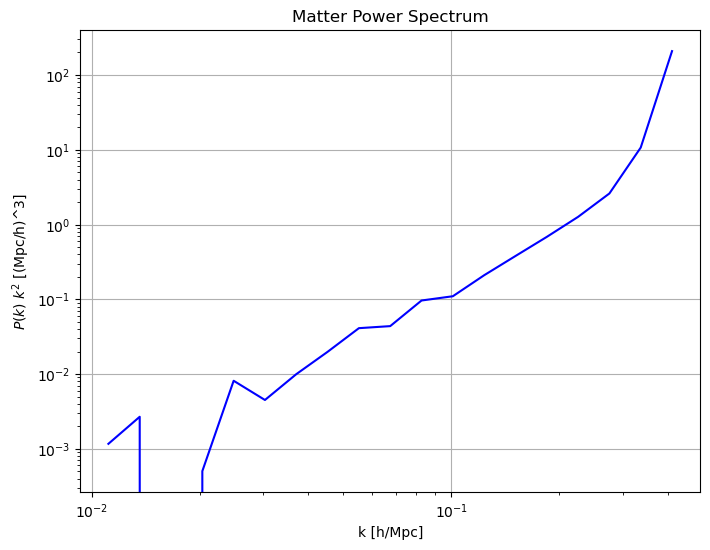

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def compute_2d_power_spectrum(density_field, box_size):
    """
    计算三维密度场的物质功率谱
    
    参数:
    density_field (numpy.ndarray): 三维密度场数组
    box_size (float): 盒子的物理大小（单位Mpc/h）

    返回:
    k_vals (numpy.ndarray): 波数
    Pk (numpy.ndarray): 功率谱
    """
    # 获取密度场的形状
    Nx, Ny = density_field.shape
    N = Nx  # 假设立方体

    # 计算傅里叶变换
    delta_k = np.fft.fftn(density_field)
    delta_k = np.fft.fftshift(delta_k)  # 将零频移到中心

    # 计算功率谱
    Pk = np.abs(delta_k) ** 2 / (N ** 2)

    # 创建波数k的网格
    kx = np.fft.fftfreq(N, d=box_size / N)
    ky = np.fft.fftfreq(N, d=box_size / N)
    # kz = np.fft.fftfreq(N, d=box_size / N)
    kx, ky = np.meshgrid(kx, ky, indexing='ij')
    k = np.sqrt(kx**2 + ky**2)

    # 将结果移回零频在中心
    k = np.fft.fftshift(k)
    Pk = np.fft.fftshift(Pk)
    mask = k > 0
    k = k[mask]
    Pk = Pk[mask]

    # 平均功率谱
    k_flat = k.flatten()
    Pk_flat = Pk.flatten()

    # 创建波数的对数间隔
    k_bins = np.logspace(np.log10(k_flat.min()), np.log10(k_flat.max()), num=20)
    k_vals = 0.5 * (k_bins[1:] + k_bins[:-1])
    Pk_vals = np.zeros_like(k_vals)

    # 在每个波数区间内进行平均
    for i in range(len(k_bins) - 1):
        mask = (k_flat >= k_bins[i]) & (k_flat < k_bins[i+1])
        if np.any(mask):
            Pk_vals[i] = np.mean(Pk_flat[mask])

    return k_vals, Pk_vals

# 示例三维密度场
N = 64  # 密度场的大小
box_size = 100.0  # 盒子大小（单位Mpc/h）
density_field = x[0,0,:,:,-1]#np.random.randn(N, N)  # 示例密度场，可以替换为实际数据

# 计算物质功率谱
k_vals, Pk_vals = compute_2d_power_spectrum(density_field, box_size)
print(k_vals.shape)
print(Pk_vals.shape)
# print(k_vals)
# print(Pk_vals)

# 绘制功率谱

plt.figure(figsize=(8, 6))
plt.loglog(k_vals, Pk_vals, 'b-')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [(Mpc/h)^3]')
plt.title('Matter Power Spectrum')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.loglog(k_vals, Pk_vals*k_vals**2, 'b-')
plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P(k)\ k^2$ [(Mpc/h)^3]')
plt.title('Matter Power Spectrum')
plt.grid(True)
plt.show()
